# AN ANALYSIS OF SALARIES PAID IN THE DATA SCIENCE FIELD BETWEEN 2020 AND 2022
### by **Washington Obungu**

## 1. Introduction
This analysis will investigate the [data science job salaries dataset](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) obtained from [Kaggle](https://www.kaggle.com/).

The dataset contains information about annual salaries paid to indivduals in different data science fields in the years 2020-2022.

The key areas of investigation are:
 1. Do salaries in specific fields increase year on year?
 2. How does salary change with experience level
 3. Do full time employees earn more than part time and freelance workers per year?
 4. Which job titles earn the highest and the lowest salaries
 5. Does the employee location affect the salaries earned?
 6. Do remote workers earn more than in-office workers?
 7. How do salaries change with company size?

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read the dataset onto a dataframe
salaries = pd.read_csv('ds_salaries.csv')
salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 2. Data Wrangling

### 2.1 Data Assessment

In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 40.4+ KB


In [4]:
salaries.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
salaries.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
salaries.duplicated().sum()

0

The issues identified to be cleaned include:

a) **Tidiness issues:**
  - Data types of the variables employment type, company size and experience level are object instead of categorical
  - The column 'unnamed' is redundant as there's already an index column
 
b) **Quality Issues:**
  - The remote ratio entries would be better understood as nominal data, with the values 'on-site', 'hybrid' and 'remote'. The variable data type should also be caegorical.

### 2.2 Data Cleaning

#### 2.2.1 Issue 1
Modify the entries of the 'remote ratio' column to be:
 - 0 -> on-site
 - 50 -> hybrid
 - 100 -> remote

In [7]:
salaries['remote_ratio'] = salaries['remote_ratio'].astype('str')

salaries['remote_ratio'] = salaries['remote_ratio'].replace('0', 'on-site')
salaries['remote_ratio'] = salaries['remote_ratio'].replace('50', 'hybrid')
salaries['remote_ratio'] = salaries['remote_ratio'].replace('100', 'remote')
salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,on-site,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,on-site,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,hybrid,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,on-site,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,hybrid,US,L


#### 2.2.2 Issue 2
The data-types of the variables work_year, experience_level, employment_type, company_size, remote_ratio will be converted to categorical types with, experience_level, company_size and remote_ratio being ordered types

In [8]:
# Change the data types to categorical
def categorical_dtypes(df, variable_dict):
    """ Changes datatypes to categorical type
    Args:
        df: The dataframe on which column data-types are to be changed
        variable_dict: A dictionary with the key as the name of the column, and value as the list of categories 
    """
    for k, v in variable_dict.items():
        cat_type = pd.api.types.CategoricalDtype(ordered=True, categories=v)
        df[k] = df[k].astype(cat_type)

#Convert the work_year column to a string
salaries['work_year'] = salaries['work_year'].astype('str')

work_years = ['2020', '2021', '2022']
experience_levels = ['EN', 'MI', 'SE', 'EX']
employment_types = ['FT', 'CT', 'PT', 'FL']
company_sizes = ['S', 'M', 'L']
remote_ratios = ['on-site', 'hybrid', 'remote']
cat_variables = {'work_year': work_years, 
                 'experience_level': experience_levels,
                 'employment_type': employment_types,
                 'company_size': company_sizes,
                 'remote_ratio': remote_ratios}

categorical_dtypes(salaries, cat_variables)
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          607 non-null    int64   
 1   work_year           607 non-null    category
 2   experience_level    607 non-null    category
 3   employment_type     607 non-null    category
 4   job_title           607 non-null    object  
 5   salary              607 non-null    int64   
 6   salary_currency     607 non-null    object  
 7   salary_in_usd       607 non-null    int64   
 8   employee_residence  607 non-null    object  
 9   remote_ratio        607 non-null    category
 10  company_location    607 non-null    object  
 11  company_size        607 non-null    category
dtypes: category(5), int64(3), object(4)
memory usage: 27.2+ KB


In [9]:
salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,on-site,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,on-site,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,hybrid,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,on-site,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,hybrid,US,L


#### 2.2.3 Issue 3
Drop the column 'Unnamed'

In [10]:
salaries = salaries.drop(columns=['Unnamed: 0'])
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis
In this section, the distribution of each variable will be investigated.

####  3.1.1. `work_year`
This section will investigate how many years are covered in the dataset as well as the distribution of the observations.

In [11]:
# View how many observations are represented by each year
salaries['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

<AxesSubplot:xlabel='work_year', ylabel='count'>

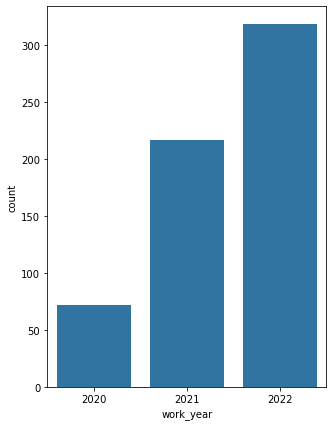

In [12]:
#Plot a bar chart to view the distribution of work_year
# Set blue as the color of the bars of the bar chart
base_color = sb.color_palette()[0]

#Plot a bar chart to view the distribution of work_year
plt.figure(figsize=[5, 7])
sb.countplot(data=salaries, x='work_year', color=base_color)

The bar chart shows a majority of the salaries represented in the dataset are from 2022

#### 3.1.2 `experience_level`
This section will investigate how many of each level of experience are represented in the dataset

In [13]:
salaries['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

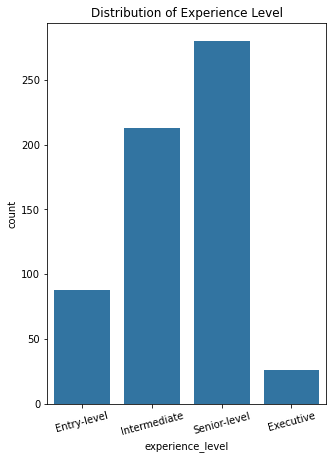

In [14]:
def plot_countplot(data, axis, variable, title, **kwargs):
    """ Plots a bar chart
    Args:
        data: The dataframe from which the bar chart will be plotted
        axis: the axis on which the data should be plotted
        variable: The column to plot
        title: The title of the barchart
    """        
    base_color = sb.color_palette()[0]
    plt.figure(figsize=[5, 7])
    if axis == 'x':
        sb.countplot(data=data, x=variable, color=base_color)
    elif axis == 'y':
        sb.countplot(data=data, y=variable, color=base_color)
    plt.title(title)


#plt.figure(figsize=(5, 7))
plot_countplot(salaries, 'x', 'experience_level', 'Distribution of Experience Level')
plt.xticks([0, 1, 2, 3], labels=['Entry-level', 'Intermediate', 'Senior-level', 'Executive'], rotation=15);

The most common experience levels are senior and intermediate

#### 3.1.3. `employment_type`
The distribution of the different employment types will be investigated

In [15]:
salaries['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Most of the salaries are for full time jobs

#### 3.1.4. `job_title`

In [16]:
salaries['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

There are many job titles but the most common is data scientist, data engineer and data analyst

#### 3.1.5. `salary_in_usd`

In [17]:
np.log10(salaries['salary_in_usd'].describe())

count    2.783189
mean     5.050372
std      4.850997
min      3.456214
25%      4.797448
50%      5.006765
75%      5.176091
max      5.778151
Name: salary_in_usd, dtype: float64

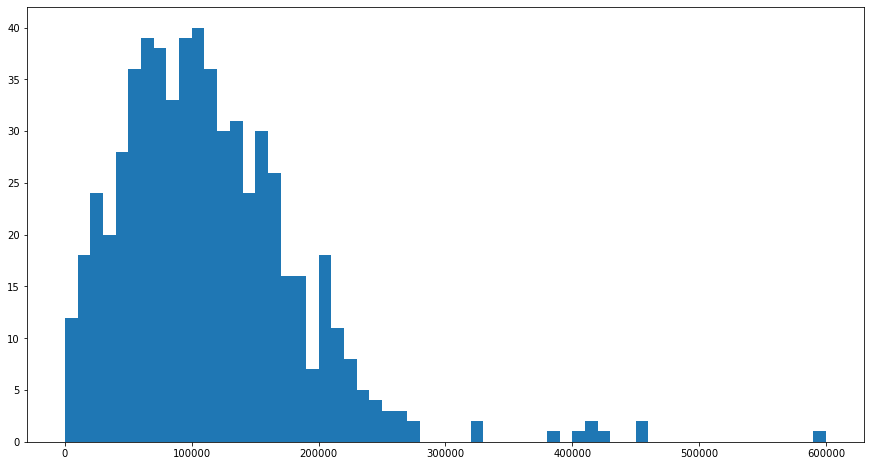

In [18]:
salary_bins = np.arange(0, 600000 + 10000, 10000)
plt.figure(figsize=[15, 8])
plt.hist(data=salaries, x='salary_in_usd', bins=salary_bins);

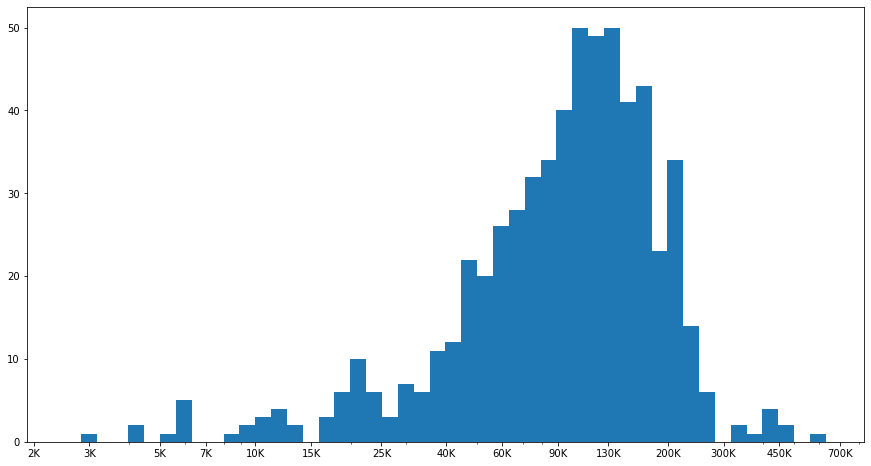

In [19]:
# Plot a histogram of the sarary_in_usd variable distribution with a log transform on the x-axis
salary_bins = np.arange(0, 600000 + 10000, 10000)
salary_bins_log = 10 ** np.arange(3.4, 5.8 + 0.05, 0.05)
salary_xticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_tick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']

plt.figure(figsize=[15, 8])
plt.hist(data=salaries, x='salary_in_usd', bins=salary_bins_log)
plt.xscale('log');
plt.xticks(salary_xticks, salary_tick_labels);

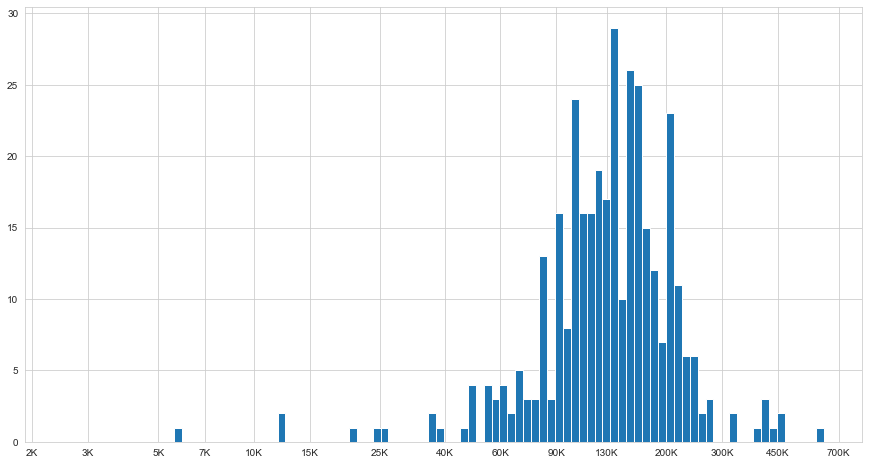

In [55]:
# Histogram of companies in te USA
salaries_USA = salaries.query('company_location == "US"')
salary_bins = np.arange(0, 600000 + 10000, 10000)
salary_bins_log = 10 ** np.arange(3.4, 5.8 + 0.025, 0.025)
salary_xticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_tick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']

plt.figure(figsize=[15, 8])
#sb.set_style('white')
plt.hist(data=salaries_USA, x='salary_in_usd', bins=salary_bins_log)
plt.xscale('log');
plt.xticks(salary_xticks, salary_tick_labels);

The distribution after a log transform appears to be left skewed and unimodal. A majority of salaries lie in the range USD 60K-150K.

#### 3.1.6. `employee_residence`

In [21]:
print(salaries['employee_residence'].nunique())
print(salaries['employee_residence'].unique())
salaries['employee_residence'].value_counts()

57
['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']


US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

There are 57 unique countries of residence in the dataset, including 2 from Nigeria and 1 from Kenya. A majority of salaries are from residents of the USA.

#### 3.1.7. `remote_ratio`

In [22]:
salaries['remote_ratio'].value_counts()

remote     381
on-site    127
hybrid      99
Name: remote_ratio, dtype: int64

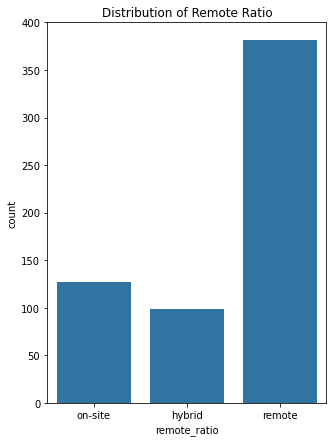

In [23]:
plot_countplot(salaries, 'x', 'remote_ratio', 'Distribution of Remote Ratio')

Majority of the salaries involve people working remotely.

#### 3.1.8. `company_location`

In [24]:
print(salaries['company_location'].nunique())
salaries['company_location'].value_counts().head()

50


US    355
GB     47
CA     30
DE     28
IN     24
Name: company_location, dtype: int64

The companies in the dataset are located in 50 different countries, with a majority of them in the USA.

#### 3.1.9. `company_size`

In [25]:
salaries['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

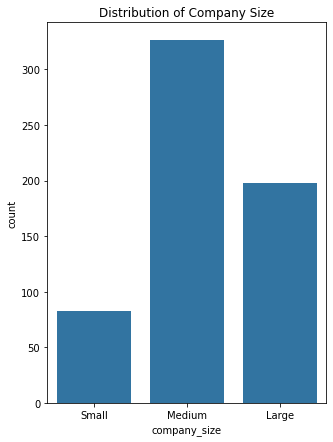

In [26]:
plot_countplot(salaries, 'x', 'company_size', 'Distribution of Company Size')
plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large']);

Majority of the companies are medium sized.

### 3.2. Bivariate Analysis
This section will begin by investigating the relationship between the main variable of interest, the salary in USD, and the other categorical variables in the dataset.

#### 3.2.1. `salary_in_usd` Vs `work_year`

In [27]:
print('2020 average salary: {}'.format(salaries.query('work_year == "2020"')['salary_in_usd'].mean()))
print('2021 average salary: {}'.format(salaries.query('work_year == "2021"')['salary_in_usd'].mean()))
print('2022 average salary: {}'.format(salaries.query('work_year == "2022"')['salary_in_usd'].mean()))

2020 average salary: 95813.0
2021 average salary: 99853.79262672811
2022 average salary: 124522.00628930818


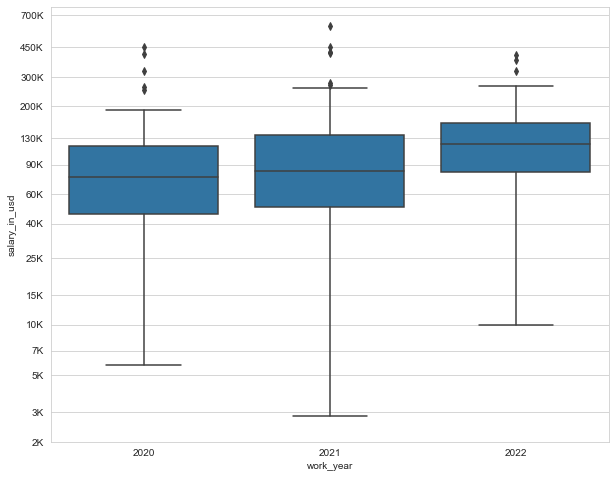

In [28]:
base_color = sb.color_palette()[0]
#salary_yticks = np.arange(0, 600000 + 50000, 50000)

plt.figure(figsize=[10, 8])
sb.set_style('whitegrid')
sb.boxplot(data=salaries, x='work_year', y='salary_in_usd', color=base_color)
#plt.yticks(salary_yticks, [y for y in salary_yticks]);

salary_yticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_ytick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']
plt.yscale('log')
plt.yticks(salary_yticks, salary_ytick_labels);

The appears to be a slight correlation between work year and an increase in median salary
It appears there was a slight increase in median salary each year.

#### 3.2.2. `salary_in_usd` Vs `employment_type`

In [29]:
emplyment_type_list = ['FT', 'CT', 'PT', 'FL']
#for t in emplyment_type_list:
    #print(t)
    #print('{} average salary: {}'.format(t, salaries.query('employment_type == "{}".format(t)')['salary_in_usd'].mean()))
    
print('Full Time average salary: {}'.format(salaries.query('employment_type == "FT"')['salary_in_usd'].mean()))
print('Contract average salary: {}'.format(salaries.query('employment_type == "CT"')['salary_in_usd'].mean()))
print('Part Time average salary: {}'.format(salaries.query('employment_type == "PT"')['salary_in_usd'].mean()))
print('Freelance average salary: {}'.format(salaries.query('employment_type == "FL"')['salary_in_usd'].mean()))

Full Time average salary: 113468.0731292517
Contract average salary: 184575.0
Part Time average salary: 33070.5
Freelance average salary: 48000.0


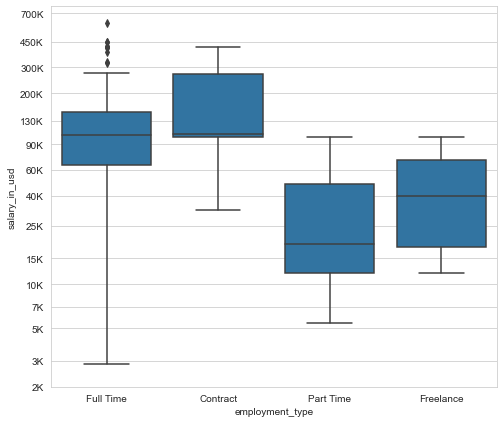

In [30]:
#salary_yticks = np.arange(0, 600000 + 50000, 50000)
plt.figure(figsize=[8, 7])
sb.boxplot(data=salaries, x='employment_type', y='salary_in_usd', color=base_color)
#plt.yticks(salary_yticks, [y for y in salary_yticks])
plt.xticks([0, 1, 2, 3], ['Full Time', 'Contract', 'Part Time', 'Freelance']);

salary_yticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_ytick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']
plt.yscale('log')
plt.yticks(salary_yticks, salary_ytick_labels);

#### 3.2.3 `salary_in_usd` Vs `experience_level`

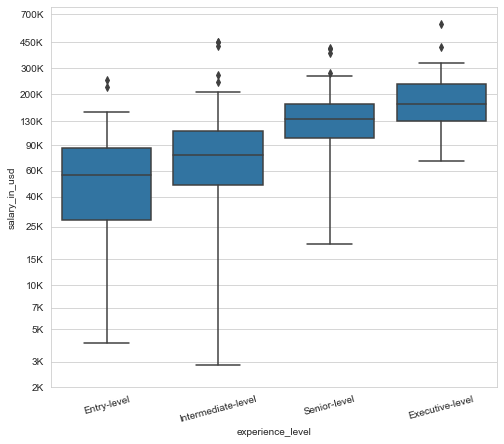

In [31]:
#salary_yticks = np.arange(0, 600000 + 50000, 50000)
plt.figure(figsize=[8, 7])
sb.boxplot(data=salaries, x='experience_level', y='salary_in_usd', color=base_color)
#plt.yticks(salary_yticks, [y for y in salary_yticks])
plt.xticks([0, 1, 2, 3], ['Entry-level', 'Intermediate-level', 'Senior-level', 'Executive-level'], rotation=15);

salary_yticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_ytick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']
plt.yscale('log')
plt.yticks(salary_yticks, salary_ytick_labels);

It appears the median salary increases with an increase in experience level

#### 3.2.4 `salary_in_usd` Vs `remote_ratio`

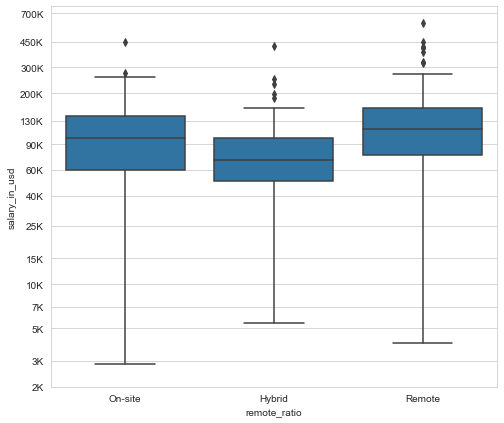

In [32]:
#salary_yticks = np.arange(0, 600000 + 50000, 50000)
plt.figure(figsize=[8, 7])
sb.boxplot(data=salaries, x='remote_ratio', y='salary_in_usd', color=base_color)
#plt.yticks(salary_yticks, [y for y in salary_yticks])
plt.xticks([0, 1, 2], ['On-site', 'Hybrid', 'Remote']);

salary_yticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_ytick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']
plt.yscale('log')
plt.yticks(salary_yticks, salary_ytick_labels);

It appears the median, maximum and minimum salaries of remote employees is slightly higher than that of on-site employees. The maximum and median salary of the hybrid employees appears to be lower than that of remote and on-site employees.

#### 3.2.5 `salary_in_usd` Vs `company_location`
Since there are 50 unique company locations, the distribution of the top 13 most represented will be investigated.

In [33]:
salaries['company_location'].value_counts().head(14)

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
Name: company_location, dtype: int64

In [34]:
salaries_comp_loc_list = salaries['company_location'].value_counts().head(13).index
print(salaries_comp_loc_list)

Index(['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'NL', 'AT', 'PT',
       'PL'],
      dtype='object')


In [35]:
salaries_comp_loc = salaries.query('company_location == "US" or company_location == "GB" or company_location == "CA" or company_location == "DE" or company_location == "IN" or company_location == "FR" or company_location == "ES" or company_location == "GR" or company_location == "JP" or company_location == "NL" or company_location == "AT" or company_location == "PT" or company_location == "PL"')
salaries_comp_loc['company_location'] = salaries_comp_loc['company_location'].sort_values(ascending=False)
salaries_comp_loc

C:\Users\WASHINGTON\AppData\Local\Temp\ipykernel_3948\3280902094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_comp_loc['company_location'] = salaries_comp_loc['company_location'].sort_values(ascending=False)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,on-site,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,on-site,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,hybrid,GB,M
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,hybrid,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,remote,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,remote,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,remote,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,on-site,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,remote,US,M


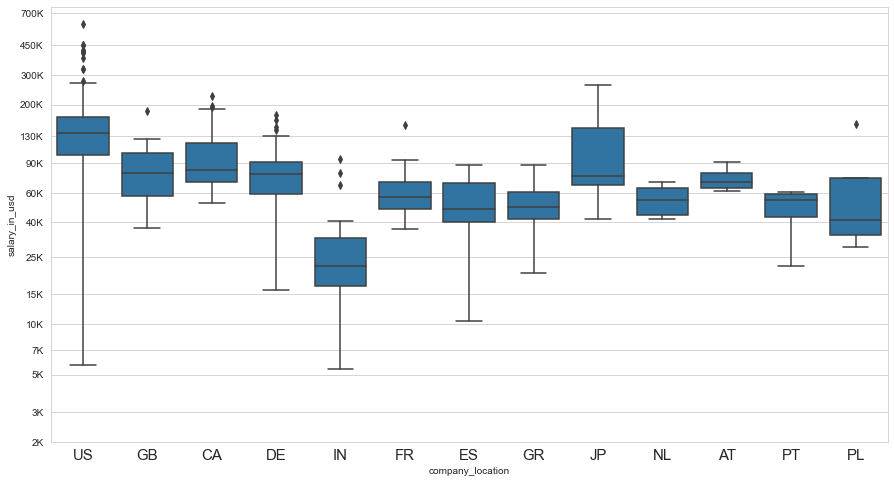

In [36]:
loc_xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
loc_xlabels = ['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'NL', 'AT', 'PT', 'PL']
#loc_xlabels = ['USA', 'Great Britain', 'Canada', 'Germany', 'India', 'France', 'Spain', 'Greece', 'Japan', 'Netherlands', 'Austria', 'Portugal', 'Poland']

salary_yticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_ytick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']

plt.figure(figsize=[15, 8])
sb.set_style('whitegrid')
sb.boxplot(data=salaries_comp_loc, x='company_location', y='salary_in_usd', color=base_color, order=loc_xlabels)
plt.xticks(loc_xticks, loc_xlabels, fontsize=15);
plt.yscale('log')
plt.yticks(salary_yticks, salary_ytick_labels);

From the box plot, there appears to be a strong correlation between company location and median salary in USD. The highest median salaries of about USD 130,000 were paid in the USA while the rest of the dataset has median salaries lower than USD 90,000. India had the lowest median salary of less than USD 25,000.

#### 3.2.6  `salary_in_usd` Vs `company_size`

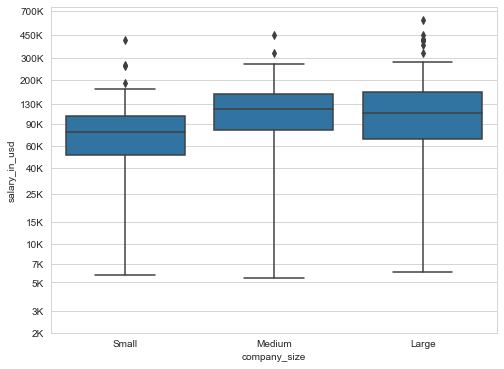

In [37]:
salary_yticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_ytick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']

plt.figure(figsize=[8, 6])
#sb.set_style('whitegrid')
sb.boxplot(data=salaries_comp_loc, x='company_size', y='salary_in_usd', color=base_color)
plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large'], fontsize=10);
plt.yscale('log')
plt.yticks(salary_yticks, salary_ytick_labels);

#### 3.2.7 `salary_in_usd` Vs `employee_residence`
In this section, since the distribution of salaries with country location has been observed, the distribution of salaries for employees whose country of residence is different from their company's location will be observed in this section.

In [38]:
salaries_diff_residence = salaries.query('employee_residence != company_location')
salaries_diff_residence['employee_residence'].value_counts().head(10)

IN    6
FR    4
BR    3
PK    3
VN    2
US    2
RO    2
PT    2
DE    2
IT    2
Name: employee_residence, dtype: int64

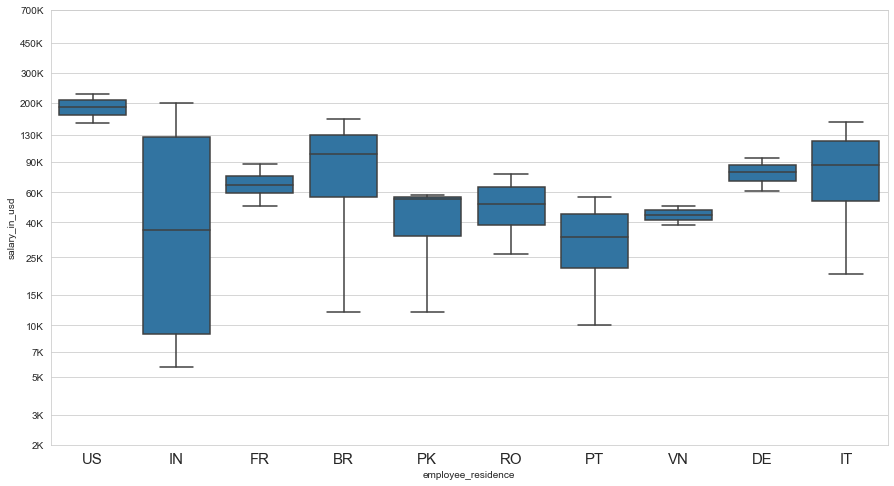

In [39]:
loc_xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
loc_xlabels = ['US', 'IN', 'FR', 'BR', 'PK', 'RO', 'PT', 'VN', 'DE', 'IT']

salary_yticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_ytick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']

plt.figure(figsize=[15, 8])
sb.set_style('whitegrid')
sb.boxplot(data=salaries_diff_residence, x='employee_residence', y='salary_in_usd', color=base_color, order=loc_xlabels)
plt.xticks(loc_xticks, loc_xlabels, fontsize=15);
plt.yscale('log')
plt.yticks(salary_yticks, salary_ytick_labels);

#### 3.2.8 `salary_in_usd` Vs `job_title`

In [40]:
salaries['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [41]:
data_science_strings = ['Science', 'Scientist', 'Machine', 'ML', 'Researcher', 'Research', 'NLP', 'Architect', 'Specialist']
data_analyst_strings = ['Analyst', 'Analytics']
data_eng_strings = ['Engineer', 'Engineering', 'ETL']
salaries_copy = salaries.copy()
salaries_copy['job_field'] = salaries_copy['job_title']

for i in range(0, 607):
    string_list =  salaries_copy['job_title'][i].split()
    j = 0
    for string in data_science_strings:
        if string in string_list:
            salaries_copy['job_field'][i] = 'Data Scientist'
            j += 1
            break
    for string in data_analyst_strings:
        if string in string_list and j == 0:
            salaries_copy['job_field'][i] = 'Data Analyst'
            j += 1
            break
    for string in data_eng_strings:
        if string in string_list and j == 0:
            salaries_copy['job_field'][i] = 'Data Engineer'
            break
    if salaries_copy['job_title'][i] == 'Head of Data':
        salaries_copy['job_field'][i] = 'Data Scientist'
salaries_copy.head()

C:\Users\WASHINGTON\AppData\Local\Temp\ipykernel_3948\2835740357.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_copy['job_field'][i] = 'Data Scientist'
C:\Users\WASHINGTON\AppData\Local\Temp\ipykernel_3948\2835740357.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_copy['job_field'][i] = 'Data Engineer'
C:\Users\WASHINGTON\AppData\Local\Temp\ipykernel_3948\2835740357.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_field
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,on-site,DE,L,Data Scientist
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,on-site,JP,S,Data Scientist
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,hybrid,GB,M,Data Engineer
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,on-site,HN,S,Data Analyst
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,hybrid,US,L,Data Scientist


In [42]:
salaries_copy['job_field'].value_counts()

Data Scientist    303
Data Engineer     169
Data Analyst      135
Name: job_field, dtype: int64

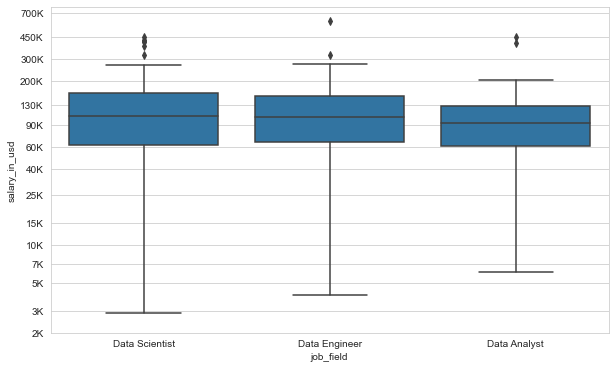

In [43]:
salary_yticks = [2000, 3000, 5000, 7000, 10000, 15000, 25000, 40000, 60000, 90000, 130000, 200000, 300000, 450000, 700000]
salary_ytick_labels = ['2K', '3K', '5K', '7K', '10K', '15K', '25K', '40K', '60K', '90K', '130K', '200K', '300K', '450K', '700K']

plt.figure(figsize=[10, 6])
sb.set_style('whitegrid')
sb.boxplot(data=salaries_copy, x='job_field', y='salary_in_usd', color=base_color)
plt.yscale('log')
plt.yticks(salary_yticks, salary_ytick_labels);

The median salary appears to be relatively similar, with the Data Analyst median salary just sligtly lower than that of Data Scientists and Data Engineer.

#### 3.2.9 Bivariate Analysis Conclusion
Following an analysis of the salaries with the categorial variables in the dataset, the variables that appear to have a strong correlation with the salary in USD are:
 - `work year` - The first quartile, median and third quartile of salaries in 2022 appears to be higher than those of 2021 and 2020, with 2021 being slightly higher than that of 2020. The median salaries are approximately USD 75,000, USD 80,000 and 115,000 in 2020, 2021 and 2022 respectively.
 - `employment type` - Full time and contract types appear to have higher median salaries compared to part-time and freelance roles as expected, however the large difference in count of contract, part time and freelance types might be adding some noise to the analysis. A further analysis may be required in terms of the effect of another variable on this distribution.
 - `experience level` - There is a strong correlation between salary and experience level as the median salary increases with an increase in experience level.
 - `remote ratio` - From the boxplots, it appears that hybrid roles earn lower median salaries compared to on-site and remote roles. This is counter-intuitive since one would expect this role's salary distribution to be in between that of the others. Some further analysis might be beneficial.
 - `company location` - Companies located in the US appear to pay significantly higher salaries compared to companies in other countries. It may be beneficial to further analyse the distribution of median salaries of the dataset, while isolating the US observations and the rest of the world.
 - `company size` - Small companies appear to pay the lowest median salaries compared to medium and large companies which are relatively similar.
 - `job title` - Data Scientist and Data Engineer roles appear to have similar median salaries while the Data Analyst role has a slightly lower median.

### 3.3 Multivariate Analysis

In [44]:
salaries['employee_residence'].value_counts().head(10)

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
Name: employee_residence, dtype: int64

In [45]:
job_titles = salaries['job_title'].value_counts().index
job_titles

Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist',
       'Data Science Manager', 'Data Architect', 'Big Data Engineer',
       'Machine Learning Scientist', 'Principal Data Scientist',
       'AI Scientist', 'Data Science Consultant', 'Director of Data Science',
       'Data Analytics Manager', 'ML Engineer', 'Computer Vision Engineer',
       'BI Data Analyst', 'Lead Data Engineer', 'Data Engineering Manager',
       'Business Data Analyst', 'Head of Data', 'Applied Data Scientist',
       'Applied Machine Learning Scientist', 'Head of Data Science',
       'Analytics Engineer', 'Data Analytics Engineer',
       'Machine Learning Developer',
       'Machine Learning Infrastructure Engineer', 'Lead Data Scientist',
       'Computer Vision Software Engineer', 'Lead Data Analyst',
       'Data Science Engineer', 'Principal Data Engineer',
       'Principal Data Analyst', 'ETL Developer', 'Product Data Analyst',
       'Dir

In [46]:
da_salaries = salaries.query('job_title == "Data Analyst" and experience_level == "EN"')
#da_salaries.query('experience_level == "EN"')
da_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,remote,US,L
38,2020,EN,FT,Data Analyst,10000,USD,10000,NG,remote,NG,S
50,2020,EN,FT,Data Analyst,450000,INR,6072,IN,on-site,IN,S
51,2020,EN,FT,Data Analyst,91000,USD,91000,US,remote,US,L
79,2021,EN,FT,Data Analyst,80000,USD,80000,US,remote,US,M
86,2021,EN,FT,Data Analyst,50000,EUR,59102,FR,hybrid,FR,M
118,2021,EN,FT,Data Analyst,90000,USD,90000,US,remote,US,S
122,2021,EN,FT,Data Analyst,50000,USD,50000,US,remote,US,M
124,2021,EN,PT,Data Analyst,8760,EUR,10354,ES,hybrid,ES,M
172,2021,EN,FT,Data Analyst,60000,USD,60000,US,remote,US,S


In [47]:
salaries['remote_ratio'].value_counts()

remote     381
on-site    127
hybrid      99
Name: remote_ratio, dtype: int64

In [48]:
salaries.query('employee_residence == "NG"')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
38,2020,EN,FT,Data Analyst,10000,USD,10000,NG,remote,NG,S
116,2021,MI,FT,Data Scientist,50000,USD,50000,NG,remote,NG,L


In [49]:
salaries.query('employment_type == "CT"')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
28,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,remote,US,L
78,2021,MI,CT,ML Engineer,270000,USD,270000,US,remote,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,remote,US,S
283,2021,SE,CT,Staff Data Scientist,105000,USD,105000,US,remote,US,M
489,2022,EN,CT,Applied Machine Learning Scientist,29000,EUR,31875,TN,remote,CZ,M


In [50]:
salaries.query('employment_type == "FL"')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
54,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,remote,US,S
184,2021,MI,FL,Machine Learning Scientist,12000,USD,12000,PK,hybrid,PK,M
208,2021,MI,FL,Data Engineer,20000,USD,20000,IT,on-site,US,L
488,2022,MI,FL,Data Scientist,100000,USD,100000,CA,remote,US,M


In [51]:
salaries.query('remote_ratio == "hybrid"').sample(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
460,2022,MI,FT,Machine Learning Infrastructure Engineer,53000,EUR,58255,PT,hybrid,PT,L
276,2021,EN,FT,Data Scientist,58000,USD,58000,US,hybrid,US,L
216,2021,EN,PT,Computer Vision Engineer,180000,DKK,28609,DK,hybrid,DK,S
145,2021,SE,FT,Machine Learning Engineer,70000,EUR,82744,BE,hybrid,BE,M
15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,hybrid,PK,L
77,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,hybrid,IN,M
221,2021,MI,FT,Data Scientist,85000,GBP,116914,GB,hybrid,GB,L
75,2021,SE,FT,Data Scientist,45000,EUR,53192,FR,hybrid,FR,L
284,2021,MI,FT,Research Scientist,69999,USD,69999,CZ,hybrid,CZ,L
52,2020,EN,FT,AI Scientist,300000,DKK,45896,DK,hybrid,DK,S


In [52]:
salaries.query('employee_residence != company_location')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,remote,GB,S
19,2020,MI,FT,Lead Data Engineer,56000,USD,56000,PT,remote,US,M
32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,remote,US,L
40,2020,MI,FT,Data Scientist,45760,USD,45760,PH,remote,US,S
53,2020,EN,FT,Data Engineer,48000,EUR,54742,PK,remote,DE,L
54,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,remote,US,S
61,2020,MI,FT,Data Engineer,130800,USD,130800,ES,remote,US,M
70,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,hybrid,LU,S
73,2021,EX,FT,BI Data Analyst,150000,USD,150000,IN,remote,US,L
82,2021,MI,FT,Applied Data Scientist,68000,CAD,54238,GB,hybrid,CA,L


In [53]:
salaries_residence = salaries['employee_residence'].value_counts().head(10)

In [54]:
salaries_copy.query('job_title == "Data Analytics Engineer" or job_title == "Data Science Engineer"')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_field
80,2021,SE,FT,Data Analytics Engineer,67000,EUR,79197,DE,remote,DE,L,Data Analyst
87,2021,MI,FT,Data Analytics Engineer,110000,USD,110000,US,remote,US,L,Data Analyst
117,2021,MI,FT,Data Science Engineer,34000,EUR,40189,GR,remote,GR,M,Data Scientist
155,2021,SE,FT,Data Science Engineer,159500,CAD,127221,CA,hybrid,CA,L,Data Scientist
186,2021,SE,FT,Data Analytics Engineer,50000,USD,50000,VN,remote,GB,M,Data Analyst
417,2022,SE,FT,Data Science Engineer,60000,USD,60000,AR,remote,MX,L,Data Scientist
514,2022,EN,FT,Data Analytics Engineer,20000,USD,20000,PK,on-site,PK,M,Data Analyst
